In [33]:
import rasterio
from rasterio.mask import mask
from rasterio.plot import show
import geopandas as gpd
from skimage.segmentation import slic
import matplotlib.pyplot as plt

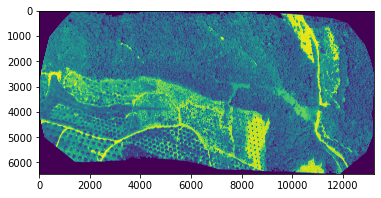

<AxesSubplot:>

In [41]:
image = rasterio.open('UAV_orthophoto (3).tif')
#show(image)
show(image.read(1))

In [35]:
AOI = gpd.read_file('AOI.shp')
shape = AOI.geometry

In [36]:
with rasterio.open("UAV_orthophoto (3).tif") as src:
    out_image, out_transform = rasterio.mask.mask(src, shape, crop=True)
    out_meta = src.meta


out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rasterio.open("image_new.tif", "w", **out_meta) as image:
    image.write(out_image)

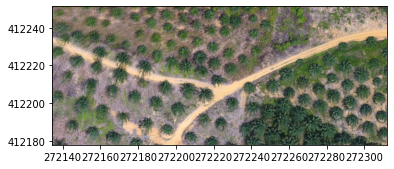

In [90]:
image = rasterio.open('image_new.tif')
show(image)
img = image.read([1,2,3])

In [91]:
img.shape

(3, 1433, 3465)

In [92]:
img = img.transpose(1,2,0)

In [93]:
img.shape

(1433, 3465, 3)

In [94]:
segments = slic(img, n_segments=1000, compactness=20, multichannel=True)

<ipython-input-94-94b70a62dc6b>:1: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = slic(img, n_segments=1000, compactness=20, multichannel=True)


In [95]:
segments.shape

(1433, 3465)

In [96]:
segments

array([[  0,   0,   0, ...,  41,  41,  41],
       [  0,   0,   0, ...,  41,  41,  41],
       [  0,   0,   0, ...,  41,  41,  41],
       ...,
       [880, 880, 880, ..., 917, 917, 917],
       [880, 880, 880, ..., 917, 917, 917],
       [880, 880, 880, ..., 917, 917, 917]])

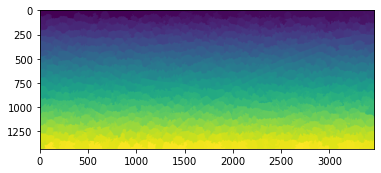

<AxesSubplot:>

In [97]:
show(segments)

In [19]:
help(slic)

Help on function slic in module skimage.segmentation.slic_superpixels:

slic(image, n_segments=100, compactness=10.0, max_iter=10, sigma=0, spacing=None, multichannel=True, convert2lab=None, enforce_connectivity=True, min_size_factor=0.5, max_size_factor=3, slic_zero=False, start_label=None, mask=None)
    Segments image using k-means clustering in Color-(x,y,z) space.
    
    Parameters
    ----------
    image : 2D, 3D or 4D ndarray
        Input image, which can be 2D or 3D, and grayscale or multichannel
        (see `multichannel` parameter).
        Input image must either be NaN-free or the NaN's must be masked out
    n_segments : int, optional
        The (approximate) number of labels in the segmented output image.
    compactness : float, optional
        Balances color proximity and space proximity. Higher values give
        more weight to space proximity, making superpixel shapes more
        square/cubic. In SLICO mode, this is the initial compactness.
        This param

In [8]:
type(segments)

numpy.ndarray

In [9]:
segments.shape

(4, 1433)